In [1]:
 # 과제
# 2차방정식 풀이 해보기
# 현재까지 만들어진 소스를 가지고
# 2차방정식을 풀어본다
# 2차 방정식 artificial 샘플을 만들고
# 2차 방정식을 위한 model (kernel 생성,  weight 크기 수정)

In [3]:
import torch

a = torch.tensor([1,2,3])
a[[0, 1]]

tensor([1, 2])

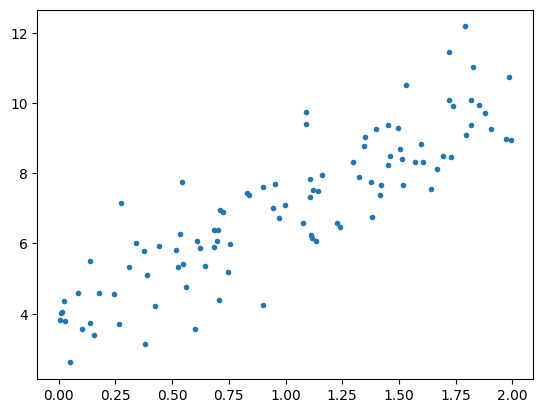

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
x = torch.rand(m, 1) * 2
y = x * 3 + 4 + torch.randn(m, 1)

plt.plot(x, y, '.')

In [5]:
dataset = list(zip(x, y))

loader = torch.utils.data.DataLoader(dataset, batch_size = 20, shuffle = True)

for xi , yi in loader: # DataLoader에서 첫 번째 배치 하나만 꺼내서 확인
    break

xi.shape, yi.shape, xi.dtype, yi.dtype

(torch.Size([20, 1]), torch.Size([20, 1]), torch.float32, torch.float32)

In [6]:
torch.linalg.pinv(torch.cat([x, x**0], axis = 1)) @ y

# [[1],
# [2],
# [3]]
# -> 
# [[1, 1],
# [2, 1],
# [3, 1]]

# shape = (100, 2)
# a(기울기) / b(절편)을 구한거임

tensor([[3.1627],
        [3.8577]])

In [7]:
W1 = torch.randn((1, 5), requires_grad= True) # 이 파라미터는 학습 대상이다.
B1 = torch.randn((5,), requires_grad= True)
W2 = torch.randn((5, 1), requires_grad= True)
B2 = torch.randn((1,), requires_grad= True)

# x.shape = (batch_size, 1)
# (batch, 1) @ (1, 5)
#  = (batch, 5)

# (batch, 5) @ (5, 1)
#  = (batch, 1)

def model(x):
    h = torch.relu(x @ W1 + B1)
    y = (h @ W2 + B2)
    return y

# optimizer(최적화)
opt = torch.optim.Adam([W1, B1, W2, B2], lr=0.0001)

loss_fn = torch.nn.MSELoss()

In [8]:
# grad

# 100개 데이터
# 20개씩 나눔
# 한 epoch당 5번 update 발생

# pred = model(bx)
# W1, B1, W2, B2로 예측값 계산

for epoch in range(10):
    for bx, by in loader:
        # 현재 파라미터를 이용해서 예측값을 구하고 f(x) = ax+b
        pred = model(bx)

        # 에러를 구하고
        loss = loss_fn(pred, by)
        
        opt.zero_grad()
        loss.backward()
        
        # update
        opt.step()
    print(epoch, loss)         
        

0 tensor(12.8785, grad_fn=<MseLossBackward0>)
1 tensor(18.0724, grad_fn=<MseLossBackward0>)
2 tensor(16.2836, grad_fn=<MseLossBackward0>)
3 tensor(14.0841, grad_fn=<MseLossBackward0>)
4 tensor(15.5683, grad_fn=<MseLossBackward0>)
5 tensor(17.5049, grad_fn=<MseLossBackward0>)
6 tensor(12.2009, grad_fn=<MseLossBackward0>)
7 tensor(17.5845, grad_fn=<MseLossBackward0>)
8 tensor(17.6413, grad_fn=<MseLossBackward0>)
9 tensor(16.1682, grad_fn=<MseLossBackward0>)


23 tensor(58.8977, grad_fn=<MseLossBackward0>)

24 tensor(62.9800, grad_fn=<MseLossBackward0>)

-> 예측과 실제값 차이의 제곱 평균

숫자가 클수록 예측이 많이 틀린 것

In [9]:
print(W1, B1, W2, B2)

tensor([[-0.2576, -0.0177,  0.1657,  2.8885, -0.0877]], requires_grad=True) tensor([-0.8647,  0.8362,  0.7735,  0.2636,  0.6314], requires_grad=True) tensor([[-2.0342],
        [ 0.5230],
        [ 0.7603],
        [ 0.5918],
        [-0.8804]], requires_grad=True) tensor([0.7458], requires_grad=True)


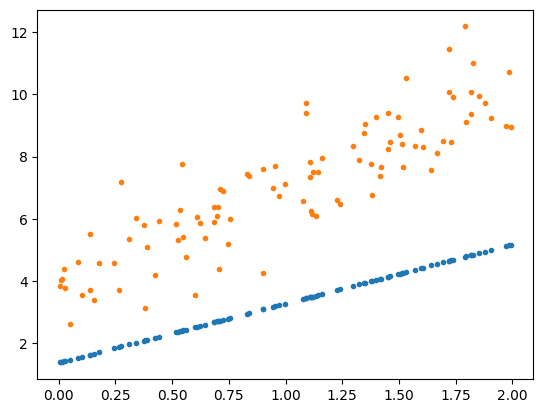

In [10]:
with torch.no_grad():
    pred = model(x)

plt.plot(x, pred, '.')

((pred-y) ** 2).mean()
plt.plot(x, y, '.')

# 과제
1. 2차방정식 풀이 해보기
2. 현재까지 만들어진 소스를 가지고
3. 2차방정식을 풀어본다
4. 2차 방정식 artificial 샘플을 만들고
5. 2차 방정식을 위한 model (kernel 생성,  weight 크기 수정)

y= 2X^2 + 3X + 5 + noise

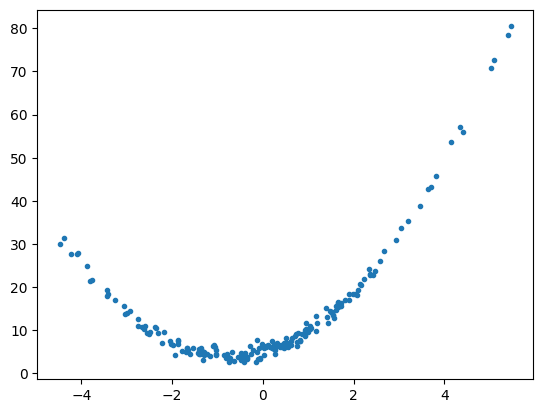

In [11]:
# 
import torch
import matplotlib.pyplot as plt

m = 200
x = torch.randn(m, 1) * 2
y = 2 * x**2 + 3*x + 5 + torch.randn(m, 1)

plt.plot(x, y, '.')

In [12]:
dataset = list(zip(x, y))
loader = torch.utils.data.DataLoader(dataset, batch_size= 20 , shuffle=True)

for xi, yi in loader:
    break
xi.shape, yi.shape, xi.dtype, yi.dtype

(torch.Size([20, 1]), torch.Size([20, 1]), torch.float32, torch.float32)

In [13]:
X = torch.cat([x**2, x, x**0], axis = 1)
print(X.shape)

torch.Size([200, 3])


In [14]:
w = torch.linalg.pinv(X) @ y

print(w)

# tensor([[2.0xxx],   ← a ≈ 2
#         [3.0xxx],   ← b ≈ 3
#         [5.0xxx]])  ← c ≈ 5

tensor([[2.0022],
        [2.9422],
        [5.0464]])


In [15]:
# 2층 신경망

W1 = torch.randn((1,32), requires_grad=True) #입력->은닉1
B1 = torch.randn((32, ), requires_grad=True)
W2 = torch.randn((32,32), requires_grad=True) #은닉1->출력
B2 = torch.randn((32, ), requires_grad=True)


# (batch,1)  @ (1,32)  = (batch,32)
# (batch,32) @ (32,1)  = (batch,1)

def model(x):
    h = torch.relu(x @ W1 + B1)
    y = (h @ W2 + B2)
    return y 

# optimize(최적화)
opt = torch.optim.Adam([W1, B1, W2, B2], lr = 0.0001)

loss_fn = torch.nn.MSELoss()

In [17]:
# grad
for epoch in range(3000):
    for bx, by in loader:
        # 현재 파라미터를 이용해서 예측갑을 구하고 f(x)=ax^2+bx+c
        pred = model(bx)
        loss = loss_fn(pred, by)
        
        opt.zero_grad()
        loss.backward()
        
        # update
        opt.step()
    print(epoch, loss)
        

0 tensor(33.3628, grad_fn=<MseLossBackward0>)
1 tensor(15.9763, grad_fn=<MseLossBackward0>)
2 tensor(7.5397, grad_fn=<MseLossBackward0>)
3 tensor(9.6812, grad_fn=<MseLossBackward0>)
4 tensor(7.7877, grad_fn=<MseLossBackward0>)
5 tensor(30.0626, grad_fn=<MseLossBackward0>)
6 tensor(6.4394, grad_fn=<MseLossBackward0>)
7 tensor(6.2912, grad_fn=<MseLossBackward0>)
8 tensor(11.8170, grad_fn=<MseLossBackward0>)
9 tensor(29.1360, grad_fn=<MseLossBackward0>)
10 tensor(16.1405, grad_fn=<MseLossBackward0>)
11 tensor(27.6584, grad_fn=<MseLossBackward0>)
12 tensor(9.7710, grad_fn=<MseLossBackward0>)
13 tensor(6.7041, grad_fn=<MseLossBackward0>)
14 tensor(23.2157, grad_fn=<MseLossBackward0>)
15 tensor(12.2015, grad_fn=<MseLossBackward0>)
16 tensor(31.2145, grad_fn=<MseLossBackward0>)
17 tensor(8.5743, grad_fn=<MseLossBackward0>)
18 tensor(5.6799, grad_fn=<MseLossBackward0>)
19 tensor(12.5521, grad_fn=<MseLossBackward0>)
20 tensor(55.5667, grad_fn=<MseLossBackward0>)
21 tensor(8.4123, grad_fn=<MseLo

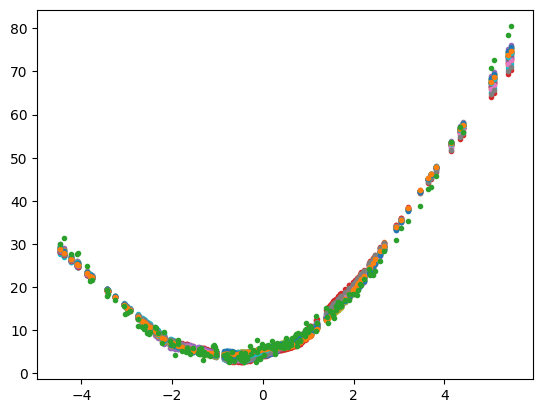

MSE: 2.2556896209716797


In [18]:
with torch.no_grad():
    pred = model(x)

plt.close('all')
plt.figure()

plt.plot(x, pred, '.')
plt.plot(x, y, '.')

plt.show()

print("MSE:", ((pred - y) ** 2).mean().item())

선형 vs 2차 비교

            선형 y=3x+4      |      2차 y=2x^2+3x+5
kernel        [x, 1]                  [x^2, x, 1]